In [ ]:

!pip install emoji --upgrade
!pip install sastrawi

In [ ]:
from google_play_scraper import Sort, reviews_all
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import emoji

In [ ]:
scrapreview= reviews_all(
'id.go.kpu.sirekap2024', #ID aplikasi
lang='id', # defaults to ‘en’
country='id', # defaults to ‘us’
sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
filter_score_with= None  # defaults to None (means all score)
)

In [ ]:
scrapreview=pd.DataFrame(scrapreview)
scrapreview.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,75c8b29f-c4c5-4e7b-a446-29d4016ca161,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Apk yg versi 2.73 ini kenapa malah susah serin...,1,186,2.73,2024-11-21 02:34:06,None,None,2.73
1,1d950146-952b-451e-a6f4-d0ac6fc4906d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya kurang stabil, scanner camera juga...",1,6,2.73,2024-11-28 04:15:40,None,None,2.73
2,8a278846-d90a-40d1-aab9-f0b3b736e5fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Di versi 2.71 lancar, dapet wa dari pps disuru...",2,19,2.73,2024-11-21 04:35:20,None,None,2.73
3,8412cb7c-3c9b-46b1-ac21-53dcb00d056a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya ikut ujibeban nasional terjadi masalah ke...,3,8,2.73,2024-11-24 14:09:18,None,None,2.73
4,aa024c7a-af4b-4d5f-b1d6-5ceea643e9c7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kalo gabisa buat aplikasi yang optimal mending...,2,14,2.73,2024-11-20 10:36:05,None,None,2.73


In [ ]:
scrapreview.shape


(20132, 11)

In [ ]:
scrapreview.nunique()

,0
reviewId,20132
userName,1
userImage,1
content,17539
score,5
thumbsUpCount,163
reviewCreatedVersion,9
at,20019
replyContent,0
repliedAt,0


In [ ]:
scrapreview.drop_duplicates(subset=['content'], inplace=True)

In [ ]:
scrapreview.duplicated(subset=['content']).sum()

0

In [ ]:

scrapreview = scrapreview[['content', 'score','at']]


In [ ]:
scrapreview.nunique()

,0
content,17539
score,5
at,17452


In [ ]:
scrapreview.to_csv('Ulasan Playstore Aplikasi SIREKAP.csv', index=None, header=True)

In [ ]:
scrapreview

,content,score,at
0,Apk yg versi 2.73 ini kenapa malah susah serin...,1,2024-11-21 02:34:06
1,"Aplikasinya kurang stabil, scanner camera juga...",1,2024-11-28 04:15:40
2,"Di versi 2.71 lancar, dapet wa dari pps disuru...",2,2024-11-21 04:35:20
3,Saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18
4,Kalo gabisa buat aplikasi yang optimal mending...,2,2024-11-20 10:36:05
...,...,...,...
20123,Mantab.....,5,2024-11-24 06:21:54
20124,☝️,5,2024-02-10 14:07:57
20125,Siiiiip......,5,2024-02-25 18:12:58
20130,🥲,1,2024-02-06 01:41:01


In [ ]:
label = []
for index, row in scrapreview.iterrows():
    if row["score"] == 5 or row["score"] == 4:
        label.append(1)
    else:
        label.append(0)

scrapreview["label"] = label
scrapreview

,content,score,at,label
0,Apk yg versi 2.73 ini kenapa malah susah serin...,1,2024-11-21 02:34:06,0
1,"Aplikasinya kurang stabil, scanner camera juga...",1,2024-11-28 04:15:40,0
2,"Di versi 2.71 lancar, dapet wa dari pps disuru...",2,2024-11-21 04:35:20,0
3,Saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18,0
4,Kalo gabisa buat aplikasi yang optimal mending...,2,2024-11-20 10:36:05,0
...,...,...,...,...
20123,Mantab.....,5,2024-11-24 06:21:54,1
20124,☝️,5,2024-02-10 14:07:57,1
20125,Siiiiip......,5,2024-02-25 18:12:58,1
20130,🥲,1,2024-02-06 01:41:01,0


In [ ]:
scrapreview['label'].value_counts()

,count
label,
0,14955
1,2584


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

preprocessing

In [ ]:
data=pd.read_csv('Ulasan Playstore Aplikasi SIREKAP.csv')
data


,content,score,at
0,Apk yg versi 2.73 ini kenapa malah susah serin...,1,2024-11-21 02:34:06
1,"Aplikasinya kurang stabil, scanner camera juga...",1,2024-11-28 04:15:40
2,"Di versi 2.71 lancar, dapet wa dari pps disuru...",2,2024-11-21 04:35:20
3,Saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18
4,Kalo gabisa buat aplikasi yang optimal mending...,2,2024-11-20 10:36:05
...,...,...,...
17534,Mantab.....,5,2024-11-24 06:21:54
17535,☝️,5,2024-02-10 14:07:57
17536,Siiiiip......,5,2024-02-25 18:12:58
17537,🥲,1,2024-02-06 01:41:01


In [ ]:
import re
import string
import unicodedata
import emoji
import pandas as pd

# Fungsi untuk membersihkan tweet
def clean_tweet(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+", "", tweet)
    tweet = re.sub(r'([a-zA-Z])([A-Z])', r'\1 \2', tweet)
    # Hapus URL
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    tweet = re.sub(r'(.)\1+', r'\1', tweet)
    # Hapus angka
    tweet = re.sub(r"\d+", "", tweet)

    # Hapus emoji
    tweet = ''.join(c for c in tweet if not emoji.is_emoji(c))

    # Hapus tanda baca
    tweet = re.sub(r'([a-zA-Z])(\.|,|\?|!|;|:)([a-zA-Z])', r'\1 \3', tweet)
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))

    # Hapus karakter yang tidak diinginkan (ekstra spasi)
    tweet = " ".join(tweet.split())

    # Normalisasi teks untuk menangani karakter asing
    tweet = unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Hapus simbol seperti "#" atau "_"
 # Hapus simbol seperti "#" atau "_"
    tweet = tweet.replace("#", "").replace("_", " ")
    return tweet

data['content']=data['content'].apply(clean_tweet)


In [ ]:
data

,content,score,at
0,Apk yg versi ini kenapa malah susah sering mac...,1,2024-11-21 02:34:06
1,Aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40
2,Di versi lancar dapet wa dari ps disuruh unins...,2,2024-11-21 04:35:20
3,Saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18
4,Kalo gabisa buat aplikasi yang optimal mending...,2,2024-11-20 10:36:05
...,...,...,...
17534,Mantab,5,2024-11-24 06:21:54
17535,,5,2024-02-10 14:07:57
17536,Sip,5,2024-02-25 18:12:58
17537,,1,2024-02-06 01:41:01


In [ ]:
import pandas as pd

# Misalnya, data_shopee adalah DataFrame Anda
data= data[data['content'].str.strip().ne('')]
data['content']=data['content'].str.lower()
data

<ipython-input-23-1fe2810b788e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content']=data['content'].str.lower()


,content,score,at
0,apk yg versi ini kenapa malah susah sering mac...,1,2024-11-21 02:34:06
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40
2,di versi lancar dapet wa dari ps disuruh unins...,2,2024-11-21 04:35:20
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18
4,kalo gabisa buat aplikasi yang optimal mending...,2,2024-11-20 10:36:05
...,...,...,...
17525,aplikasinya angel,5,2024-02-05 20:56:03
17526,luart biasa,5,2024-01-31 14:57:05
17527,saya perlu,5,2024-11-10 14:25:06
17534,mantab,5,2024-11-24 06:21:54


In [ ]:
slang=pd.read_csv('/content/new_kamusalay.csv',encoding='latin-1')
slang

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [ ]:
def slang_to_formal(text, slang_dict):
    text = str(text) # Convert the Series object to a string
    words = text.split()
    formal_words = [slang_dict.get(word, word) for word in words]
    return " ".join(formal_words)
def load_slang_dict_from_csv(csv_file):
    # Load file CSV menjadi DataFrame
    df = pd.read_csv(csv_file,encoding='latin-1')
    # Pastikan kolom benar dan buat kamus slang-to-formal
    if 'anakjakartaasikasik' in df.columns and 'anak jakarta asyik asyik' in df.columns:
        slang_dict = dict(zip(df['anakjakartaasikasik'], df['anak jakarta asyik asyik']))
        return slang_dict
    else:
        raise ValueError("Kolom 'aamiin' dan 'amin' tidak ditemukan dalam file CSV")

slang_dict = load_slang_dict_from_csv('/content/new_kamusalay.csv')  # Sesuaikan path
data['content'] = data['content'].apply(slang_to_formal, slang_dict=slang_dict)
data


<ipython-input-25-a676f48c2ad6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(slang_to_formal, slang_dict=slang_dict)


,content,score,at
0,apakah yang versi ini kenapa malah susah serin...,1,2024-11-21 02:34:06
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40
2,di versi lancar dapat wa dari play station dis...,2,2024-11-21 04:35:20
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18
4,kalau tidak bisa buat aplikasi yang optimal me...,2,2024-11-20 10:36:05
...,...,...,...
17525,aplikasinya angel,5,2024-02-05 20:56:03
17526,luart biasa,5,2024-01-31 14:57:05
17527,saya perlu,5,2024-11-10 14:25:06
17534,mantap,5,2024-11-24 06:21:54


In [ ]:
import nltk

# Unduh dataset 'punkt'
nltk.download('punkt_tab')

# Fungsi tokenisasi menggunakan NLTK
from nltk.tokenize import word_tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

data['tokenize text']=data['content'].apply(tokenize)
datatoken = data
datatoken

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-26-1131c136bac1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenize text']=data['content'].apply(tokenize)


,content,score,at,tokenize text
0,apakah yang versi ini kenapa malah susah serin...,1,2024-11-21 02:34:06,"[apakah, yang, versi, ini, kenapa, malah, susa..."
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40,"[aplikasinya, kurang, stabil, scaner, camera, ..."
2,di versi lancar dapat wa dari play station dis...,2,2024-11-21 04:35:20,"[di, versi, lancar, dapat, wa, dari, play, sta..."
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18,"[saya, ikut, ujibeban, nasional, terjadi, masa..."
4,kalau tidak bisa buat aplikasi yang optimal me...,2,2024-11-20 10:36:05,"[kalau, tidak, bisa, buat, aplikasi, yang, opt..."
...,...,...,...,...
17525,aplikasinya angel,5,2024-02-05 20:56:03,"[aplikasinya, angel]"
17526,luart biasa,5,2024-01-31 14:57:05,"[luart, biasa]"
17527,saya perlu,5,2024-11-10 14:25:06,"[saya, perlu]"
17534,mantap,5,2024-11-24 06:21:54,[mantap]


In [ ]:

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Buat objek stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Definisikan fungsi untuk menghapus stopword
def remove_stopwords(text):
    if isinstance(text, list):  # Jika input berupa list token
        text = " ".join(text)
    elif not isinstance(text, str):  # Tangani input yang bukan string
        return ""
    text = stopword_remover.remove(text)  # Hapus stopword
    return text.split()  # Kembalikan dalam bentuk list token

datatoken['stop removal text']= datatoken['tokenize text'].apply(remove_stopwords)
datatokenstop = datatoken
datatokenstop


<ipython-input-27-b84adf2c1c85>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatoken['stop removal text']= datatoken['tokenize text'].apply(remove_stopwords)


,content,score,at,tokenize text,stop removal text
0,apakah yang versi ini kenapa malah susah serin...,1,2024-11-21 02:34:06,"[apakah, yang, versi, ini, kenapa, malah, susa...","[versi, malah, susah, sering, macet, pas, mau,..."
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40,"[aplikasinya, kurang, stabil, scaner, camera, ...","[aplikasinya, kurang, stabil, scaner, camera, ..."
2,di versi lancar dapat wa dari play station dis...,2,2024-11-21 04:35:20,"[di, versi, lancar, dapat, wa, dari, play, sta...","[versi, lancar, wa, play, station, disuruh, un..."
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18,"[saya, ikut, ujibeban, nasional, terjadi, masa...","[ikut, ujibeban, nasional, terjadi, masalah, c..."
4,kalau tidak bisa buat aplikasi yang optimal me...,2,2024-11-20 10:36:05,"[kalau, tidak, bisa, buat, aplikasi, yang, opt...","[kalau, bisa, buat, aplikasi, optimal, mending..."
...,...,...,...,...,...
17525,aplikasinya angel,5,2024-02-05 20:56:03,"[aplikasinya, angel]","[aplikasinya, angel]"
17526,luart biasa,5,2024-01-31 14:57:05,"[luart, biasa]","[luart, biasa]"
17527,saya perlu,5,2024-11-10 14:25:06,"[saya, perlu]",[perlu]
17534,mantap,5,2024-11-24 06:21:54,[mantap],[mantap]


In [ ]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
# Create a stemmer object using the factory
stemmer = factory.create_stemmer()

def stem_text(text):
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return ' '.join(stemmed_tokens)

datatokenstop['stemmed_text'] = datatokenstop['stop removal text'].apply(stem_text)
datatokenstopstem = datatokenstop
datatokenstopstem

<ipython-input-28-3dc3eb25e626>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatokenstop['stemmed_text'] = datatokenstop['stop removal text'].apply(stem_text)


,content,score,at,tokenize text,stop removal text,stemmed_text
0,apakah yang versi ini kenapa malah susah serin...,1,2024-11-21 02:34:06,"[apakah, yang, versi, ini, kenapa, malah, susa...","[versi, malah, susah, sering, macet, pas, mau,...",versi malah susah sering macet pas mau masuk p...
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40,"[aplikasinya, kurang, stabil, scaner, camera, ...","[aplikasinya, kurang, stabil, scaner, camera, ...",aplikasi kurang stabil scaner camera kurang ba...
2,di versi lancar dapat wa dari play station dis...,2,2024-11-21 04:35:20,"[di, versi, lancar, dapat, wa, dari, play, sta...","[versi, lancar, wa, play, station, disuruh, un...",versi lancar wa play station suruh uninstal it...
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18,"[saya, ikut, ujibeban, nasional, terjadi, masa...","[ikut, ujibeban, nasional, terjadi, masalah, c...",ikut ujibeban nasional jadi masalah c hasil un...
4,kalau tidak bisa buat aplikasi yang optimal me...,2,2024-11-20 10:36:05,"[kalau, tidak, bisa, buat, aplikasi, yang, opt...","[kalau, bisa, buat, aplikasi, optimal, mending...",kalau bisa buat aplikasi optimal mending buat ...
...,...,...,...,...,...,...
17525,aplikasinya angel,5,2024-02-05 20:56:03,"[aplikasinya, angel]","[aplikasinya, angel]",aplikasi angel
17526,luart biasa,5,2024-01-31 14:57:05,"[luart, biasa]","[luart, biasa]",luart biasa
17527,saya perlu,5,2024-11-10 14:25:06,"[saya, perlu]",[perlu],perlu
17534,mantap,5,2024-11-24 06:21:54,[mantap],[mantap],mantap


In [ ]:
datatokenstopstem.to_csv('clean! Ulasan Playstore Aplikasi SIREKAP .csv', index=None, header=True)

In [ ]:
label = []
for index, row in datatokenstopstem.iterrows():
    if row["score"] == 5 or row["score"] == 4:
        label.append(1)
    else:
        label.append(0)

datatokenstopstem["label"] = label
datatokenstopstem

<ipython-input-30-33d34cdd3978>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatokenstopstem["label"] = label


,content,score,at,tokenize text,stop removal text,stemmed_text,label
0,apakah yang versi ini kenapa malah susah serin...,1,2024-11-21 02:34:06,"[apakah, yang, versi, ini, kenapa, malah, susa...","[versi, malah, susah, sering, macet, pas, mau,...",versi malah susah sering macet pas mau masuk p...,0
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40,"[aplikasinya, kurang, stabil, scaner, camera, ...","[aplikasinya, kurang, stabil, scaner, camera, ...",aplikasi kurang stabil scaner camera kurang ba...,0
2,di versi lancar dapat wa dari play station dis...,2,2024-11-21 04:35:20,"[di, versi, lancar, dapat, wa, dari, play, sta...","[versi, lancar, wa, play, station, disuruh, un...",versi lancar wa play station suruh uninstal it...,0
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18,"[saya, ikut, ujibeban, nasional, terjadi, masa...","[ikut, ujibeban, nasional, terjadi, masalah, c...",ikut ujibeban nasional jadi masalah c hasil un...,0
4,kalau tidak bisa buat aplikasi yang optimal me...,2,2024-11-20 10:36:05,"[kalau, tidak, bisa, buat, aplikasi, yang, opt...","[kalau, bisa, buat, aplikasi, optimal, mending...",kalau bisa buat aplikasi optimal mending buat ...,0
...,...,...,...,...,...,...,...
17525,aplikasinya angel,5,2024-02-05 20:56:03,"[aplikasinya, angel]","[aplikasinya, angel]",aplikasi angel,1
17526,luart biasa,5,2024-01-31 14:57:05,"[luart, biasa]","[luart, biasa]",luart biasa,1
17527,saya perlu,5,2024-11-10 14:25:06,"[saya, perlu]",[perlu],perlu,1
17534,mantap,5,2024-11-24 06:21:54,[mantap],[mantap],mantap,1


In [ ]:
datatokenstopstem.to_csv('Label! Ulasan Playstore Aplikasi SIREKAP .csv', index=None, header=True)

model

In [ ]:
datatokenstopstem = pd.read_csv('/content/Label! Ulasan Playstore Aplikasi SIREKAP .csv')
datatokenstopstem

,content,score,at,tokenize text,stop removal text,stemmed_text,label
0,apakah yang versi ini kenapa malah susah serin...,1,2024-11-21 02:34:06,"['apakah', 'yang', 'versi', 'ini', 'kenapa', '...","['versi', 'malah', 'susah', 'sering', 'macet',...",versi malah susah sering macet pas mau masuk p...,0
1,aplikasinya kurang stabil scaner camera juga k...,1,2024-11-28 04:15:40,"['aplikasinya', 'kurang', 'stabil', 'scaner', ...","['aplikasinya', 'kurang', 'stabil', 'scaner', ...",aplikasi kurang stabil scaner camera kurang ba...,0
2,di versi lancar dapat wa dari play station dis...,2,2024-11-21 04:35:20,"['di', 'versi', 'lancar', 'dapat', 'wa', 'dari...","['versi', 'lancar', 'wa', 'play', 'station', '...",versi lancar wa play station suruh uninstal it...,0
3,saya ikut ujibeban nasional terjadi masalah ke...,3,2024-11-24 14:09:18,"['saya', 'ikut', 'ujibeban', 'nasional', 'terj...","['ikut', 'ujibeban', 'nasional', 'terjadi', 'm...",ikut ujibeban nasional jadi masalah c hasil un...,0
4,kalau tidak bisa buat aplikasi yang optimal me...,2,2024-11-20 10:36:05,"['kalau', 'tidak', 'bisa', 'buat', 'aplikasi',...","['kalau', 'bisa', 'buat', 'aplikasi', 'optimal...",kalau bisa buat aplikasi optimal mending buat ...,0
...,...,...,...,...,...,...,...
17474,aplikasinya angel,5,2024-02-05 20:56:03,"['aplikasinya', 'angel']","['aplikasinya', 'angel']",aplikasi angel,1
17475,luart biasa,5,2024-01-31 14:57:05,"['luart', 'biasa']","['luart', 'biasa']",luart biasa,1
17476,saya perlu,5,2024-11-10 14:25:06,"['saya', 'perlu']",['perlu'],perlu,1
17477,mantap,5,2024-11-24 06:21:54,['mantap'],['mantap'],mantap,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [ ]:
!pip install imblearn

In [ ]:
print("Dimensi data training sebelum SMOTE:", X_train.shape)
print("Dimensi data training setelah SMOTE:", X_train_resampled.shape)

print("Distribusi label sebelum SMOTE:\n", pd.Series(y_train).value_counts())
print("\nDistribusi label setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Dimensi data training sebelum SMOTE: (13983, 7799)
Dimensi data training setelah SMOTE: (23916, 7799)
Distribusi label sebelum SMOTE:
 label
0    11958
1     2025
Name: count, dtype: int64

Distribusi label setelah SMOTE:
 label
0    11958
1    11958
Name: count, dtype: int64


In [ ]:

from sklearn.naive_bayes import GaussianNB

datatokenstopstem['stemmed_text'] = datatokenstopstem['stemmed_text'].fillna('')

# Now, proceed with your feature extraction and model training
X = datatokenstopstem['stemmed_text']
y = datatokenstopstem['label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Latih model dengan data pelatihan yang telah di-resampling
classiffier = GaussianNB()
classiffier.fit(X_train_resampled, y_train_resampled)

y_pred = classiffier.predict(X_test)

# Evaluasi akurasi dan laporan klasifikasi
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi prediksi: 46.45%
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.92      0.40      0.56      2962
           1       0.20      0.82      0.32       534

    accuracy                           0.46      3496
   macro avg       0.56      0.61      0.44      3496
weighted avg       0.81      0.46      0.52      3496



In [ ]:

from sklearn.naive_bayes import MultinomialNB

datatokenstopstem['stemmed_text'] = datatokenstopstem['stemmed_text'].fillna('')

# Now, proceed with your feature extraction and model training
X = datatokenstopstem['stemmed_text']
y = datatokenstopstem['label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Latih model dengan data pelatihan yang telah di-resampling
classiffier = MultinomialNB()
classiffier.fit(X_train_resampled, y_train_resampled)

y_pred = classiffier.predict(X_test)

# Evaluasi akurasi dan laporan klasifikasi
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi prediksi: 82.58%
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2962
           1       0.45      0.64      0.53       534

    accuracy                           0.83      3496
   macro avg       0.69      0.75      0.71      3496
weighted avg       0.86      0.83      0.84      3496



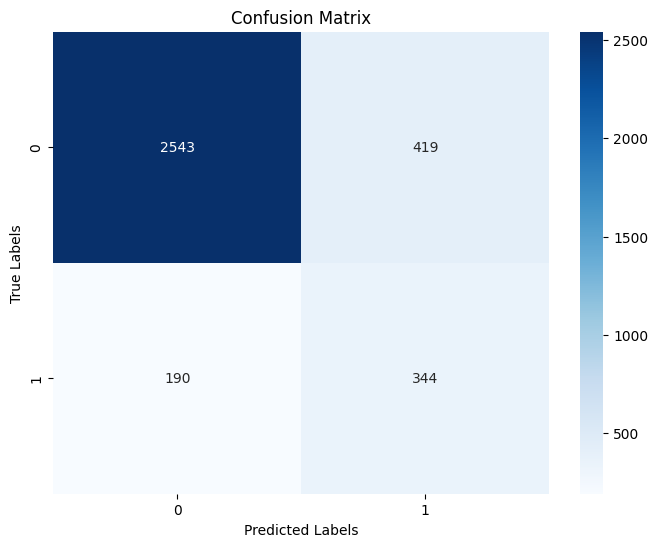

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import numpy as np

def confusiin(conf_matrix):
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()
Test_CMatrix = confusion_matrix(y_test, y_pred)
confusiin(Test_CMatrix)


In [ ]:
# Melihat distribusi kelas prediksi
prediksi_distribusi = pd.Series(y_pred).value_counts()

print(f'Distribusi kelas prediksi:\n{prediksi_distribusi}')


Distribusi kelas prediksi:
0    2733
1     763
Name: count, dtype: int64


In [ ]:
datatokenstopstem['label_machine_learning'] = classiffier.predict(vectorizer.transform(datatokenstopstem['stemmed_text']))

# Gabungkan dengan prediksi
datatokenstopstem['predicted_label'] = datatokenstopstem['label_machine_learning']

# Tampilkan DataFrame lengkap
datak = datatokenstopstem[['stemmed_text', 'score', 'at', 'label', 'predicted_label']]
datak

,stemmed_text,score,at,label,predicted_label
0,versi malah susah sering macet pas mau masuk p...,1,2024-11-21 02:34:06,0,0
1,aplikasi kurang stabil scaner camera kurang ba...,1,2024-11-28 04:15:40,0,0
2,versi lancar wa play station suruh uninstal it...,2,2024-11-21 04:35:20,0,0
3,ikut ujibeban nasional jadi masalah c hasil un...,3,2024-11-24 14:09:18,0,0
4,kalau bisa buat aplikasi optimal mending buat ...,2,2024-11-20 10:36:05,0,0
...,...,...,...,...,...
17474,aplikasi angel,5,2024-02-05 20:56:03,1,1
17475,luart biasa,5,2024-01-31 14:57:05,1,1
17476,perlu,5,2024-11-10 14:25:06,1,1
17477,mantap,5,2024-11-24 06:21:54,1,1


In [ ]:
datak.duplicated(subset=['stemmed_text']).sum()
datak.drop_duplicates(subset=['stemmed_text'], inplace=True)
datak.duplicated(subset=['stemmed_text']).sum()
datak

<ipython-input-111-8f319981451c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datak.drop_duplicates(subset=['stemmed_text'], inplace=True)


,stemmed_text,score,at,label,predicted_label
0,versi malah susah sering macet pas mau masuk p...,1,2024-11-21 02:34:06,0,0
1,aplikasi kurang stabil scaner camera kurang ba...,1,2024-11-28 04:15:40,0,0
2,versi lancar wa play station suruh uninstal it...,2,2024-11-21 04:35:20,0,0
3,ikut ujibeban nasional jadi masalah c hasil un...,3,2024-11-24 14:09:18,0,0
4,kalau bisa buat aplikasi optimal mending buat ...,2,2024-11-20 10:36:05,0,0
...,...,...,...,...,...
17468,god game,5,2025-01-04 23:48:25,1,1
17471,mida internet,5,2024-02-05 04:26:21,1,1
17472,eror aplikasi,5,2024-11-10 03:09:03,1,0
17474,aplikasi angel,5,2024-02-05 20:56:03,1,1


In [ ]:
datak.to_csv('Prediksi Hasil Ml Si rekap.csv')

In [ ]:
true_labels = datatokenstopstem['label'].values  # True labels
predicted_labels = datatokenstopstem['predicted_label'].values # Predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy between 'Label' and 'Label new': {accuracy * 100:.2f}%")

Accuracy between 'Label' and 'Label new': 87.18%


In [ ]:
from sklearn import svm


X = datatokenstopstem['stemmed_text']
y = datatokenstopstem['label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Latih model dengan data pelatihan yang telah di-resampling
SVM = svm.SVC(kernel='linear')
classiffier = SVM
classiffier.fit(X_train_resampled, y_train_resampled)


y_pred = classiffier.predict(X_test)

# Evaluasi akurasi dan laporan klasifikasi
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi prediksi: 80.43%
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2962
           1       0.42      0.73      0.53       534

    accuracy                           0.80      3496
   macro avg       0.68      0.77      0.70      3496
weighted avg       0.86      0.80      0.82      3496



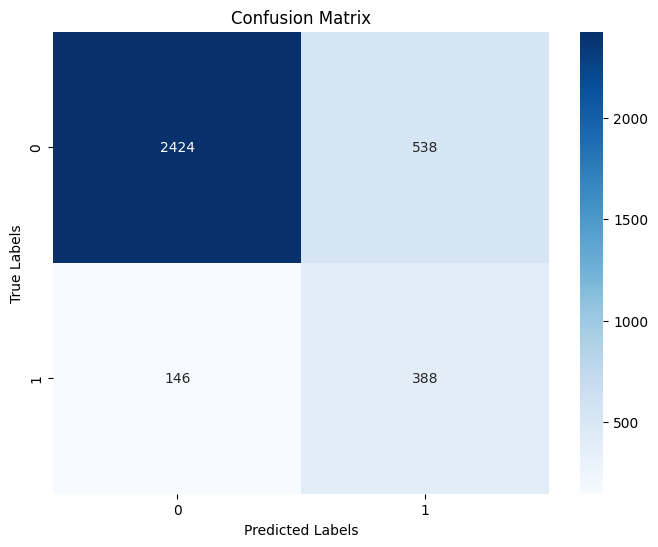

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import numpy as np

def confusiin(conf_matrix):
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()
Test_CMatrix = confusion_matrix(y_test, y_pred)

confusiin(Test_CMatrix)


In [ ]:
import joblib # Import the joblib library

joblib.dump(classiffier, 'svmsirekap.joblib')

['svmsirekap.joblib']

In [ ]:
!pip install tensorflow
!pip install keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


# 1. Persiapan Data
X = datatokenstopstem['stemmed_text'].values
y = datatokenstopstem['label'].values

# 2. Tokenisasi dan Padding
max_features = 5000  # Jumlah kata unik maksimum
max_length = 200    # Panjang maksimum kalimat

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_length)

# 3. Bagi Data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Terapkan SMOTE pada data pelatihan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# 5. Bangun Model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# 6. Kompilasi Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 7. Latih Model
model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# 8. Evaluasi Model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Ubah probabilitas menjadi label 0/1
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi prediksi: {akurasi * 100:.2f}%')
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


748/748 ━━━━━━━━━━━━━━━━━━━━ 432s 570ms/step - accuracy: 0.6654 - loss: 0.6093 - val_accuracy: 0.7449 - val_loss: 0.5269
Epoch 2/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 442s 571ms/step - accuracy: 0.7622 - loss: 0.4879 - val_accuracy: 0.8061 - val_loss: 0.4477
Epoch 3/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 432s 557ms/step - accuracy: 0.8252 - loss: 0.3951 - val_accuracy: 0.7915 - val_loss: 0.4614
Epoch 4/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 442s 556ms/step - accuracy: 0.8585 - loss: 0.3294 - val_accuracy: 0.7949 - val_loss: 0.4756
Epoch 5/5
748/748 ━━━━━━━━━━━━━━━━━━━━ 442s 557ms/step - accuracy: 0.8799 - loss: 0.2810 - val_accuracy: 0.7898 - val_loss: 0.5093
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step
Akurasi prediksi: 78.98%
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2962
           1       0.39      0.65      0.48       534

    accuracy                           0.79      3496
   macro avg       0.66      0.73      0.68     

# Visualisasi

In [ ]:
import pandas as pd
datakk = pd.read_csv('/content/Prediksi Hasil Ml Si rekap (1).csv')
datakk

,Unnamed: 0,stemmed_text,score,at,label,predicted_label
0,0,versi malah susah sering macet pas mau masuk p...,1,2024-11-21 02:34:06,0,0
1,1,aplikasi kurang stabil scaner camera kurang ba...,1,2024-11-28 04:15:40,0,0
2,2,versi lancar wa play station suruh uninstal it...,2,2024-11-21 04:35:20,0,0
3,3,ikut ujibeban nasional jadi masalah c hasil un...,3,2024-11-24 14:09:18,0,0
4,4,kalau bisa buat aplikasi optimal mending buat ...,2,2024-11-20 10:36:05,0,0
...,...,...,...,...,...,...
16033,17468,god game,5,2025-01-04 23:48:25,1,1
16034,17471,mida internet,5,2024-02-05 04:26:21,1,1
16035,17472,eror aplikasi,5,2024-11-10 03:09:03,1,0
16036,17474,aplikasi angel,5,2024-02-05 20:56:03,1,1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


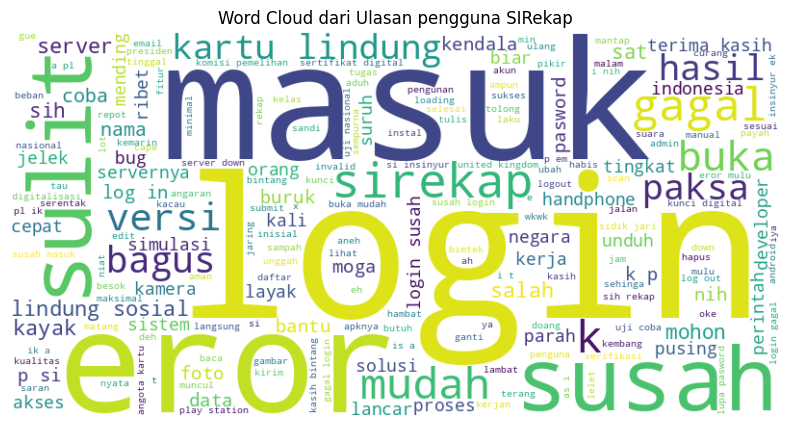

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Gabungkan semua teks yang telah diproses menjadi satu string
all_text = ' '.join(datakk['stemmed_text'].dropna())
stop_words = set(stopwords.words('indonesian'))
# Membuat daftar stopwords tambahan jika diperlukan
additional_stopwords = set(['gimana', 'bikin', 'banget', 'kalo', 'dan', 'yang', 'ini','saja','c','gini','sampek','nya','kalau','tidak', 'di', 'sama','aplikasi','pakai','pilih','pas','h'])  # Tambahkan stopwords sesuai kebutuhan
combined_stopwords = stop_words.union(additional_stopwords)

# Membuat Word Cloud dengan memfilter stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=combined_stopwords  # Memasukkan daftar stopwords
).generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu

plt.title('Word Cloud dari Ulasan pengguna SIRekap')
plt.show()


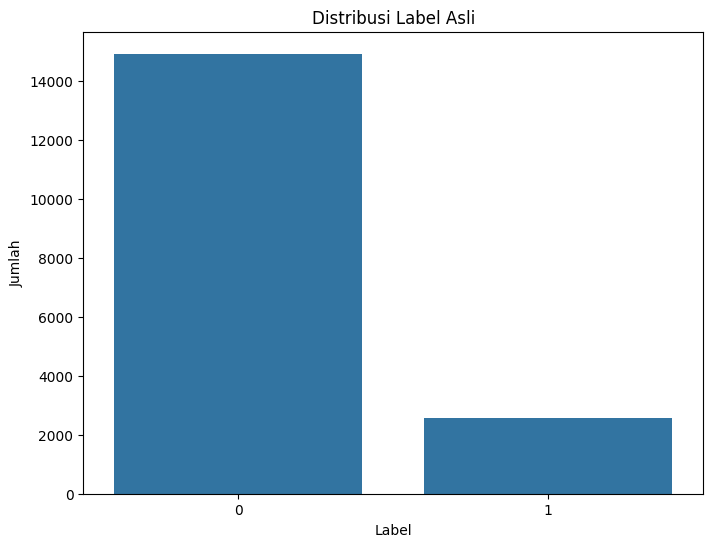

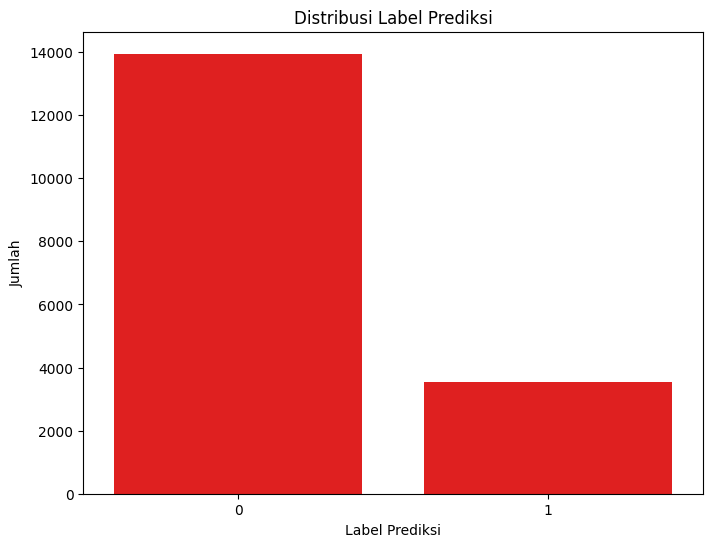

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik distribusi label asli
plt.figure(figsize=(8,6))
sns.countplot(data=datatokenstopstem, x='label')
plt.title('Distribusi Label Asli')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

# Grafik distribusi label prediksi
plt.figure(figsize=(8,6))
sns.countplot(data=datatokenstopstem, x='predicted_label', color='red')
plt.title('Distribusi Label Prediksi')
plt.xlabel('Label Prediksi')
plt.ylabel('Jumlah')
plt.show()


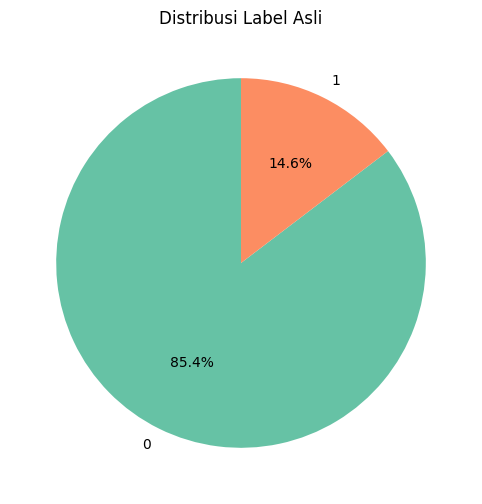

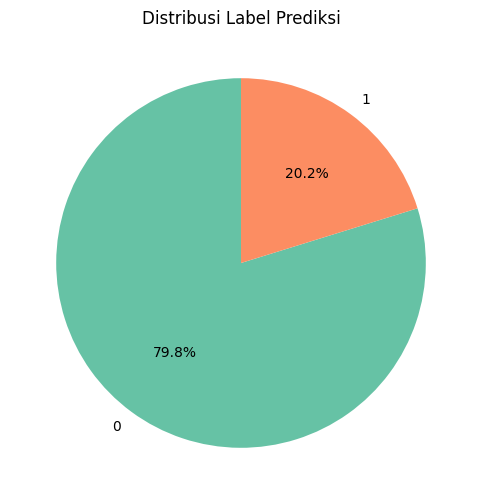

In [ ]:
# Pie chart untuk distribusi label asli
label_counts = datatokenstopstem['label'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(label_counts)))
plt.title('Distribusi Label Asli')
plt.show()

# Pie chart untuk distribusi label prediksi
predicted_counts = datatokenstopstem['predicted_label'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(predicted_counts)))
plt.title('Distribusi Label Prediksi')
plt.show()


<ipython-input-141-90154a1c4eb7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='month_year', data=datatokenstopstem, palette=kpu_colors)
<ipython-input-141-90154a1c4eb7>:19: UserWarning: 
The palette list has fewer values (3) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='month_year', data=datatokenstopstem, palette=kpu_colors)
<ipython-input-141-90154a1c4eb7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='score', data=datatokenstopstem, palette=kpu_colors)
<ipython-input-141-90154a1c4eb7>:24: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.co

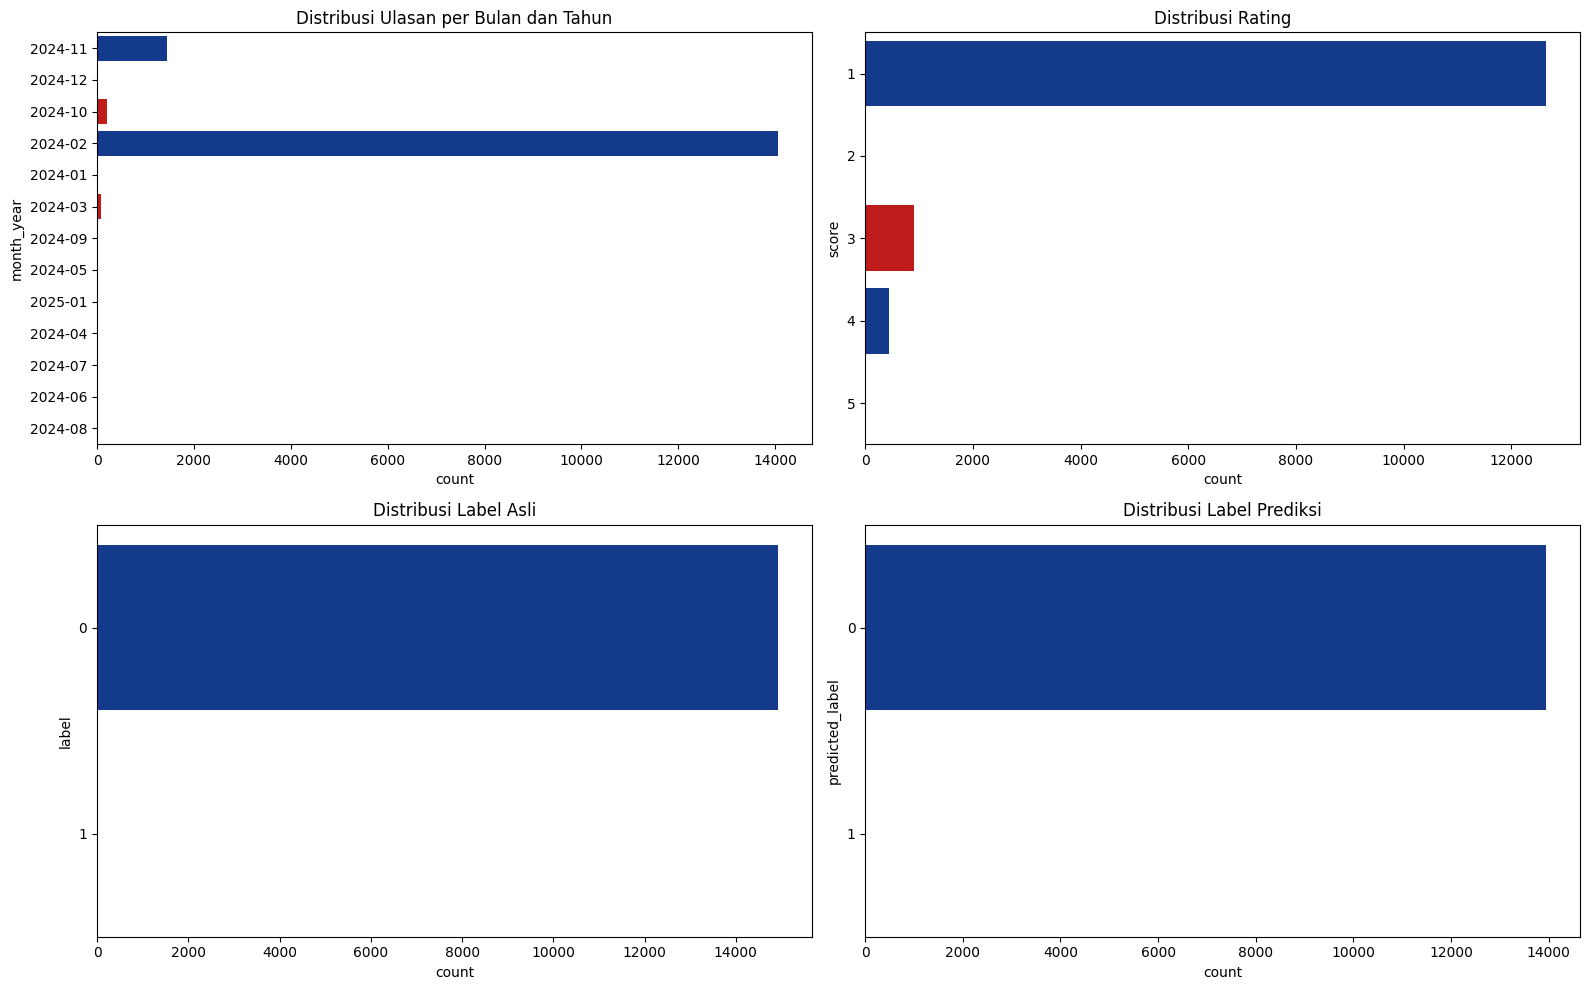

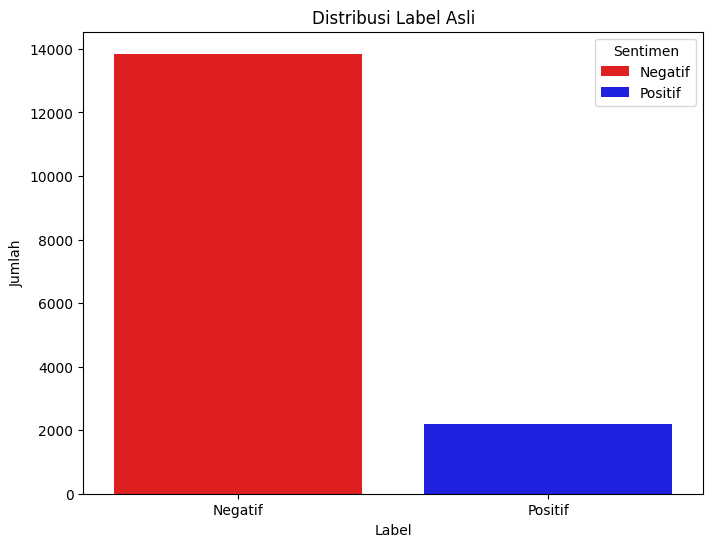

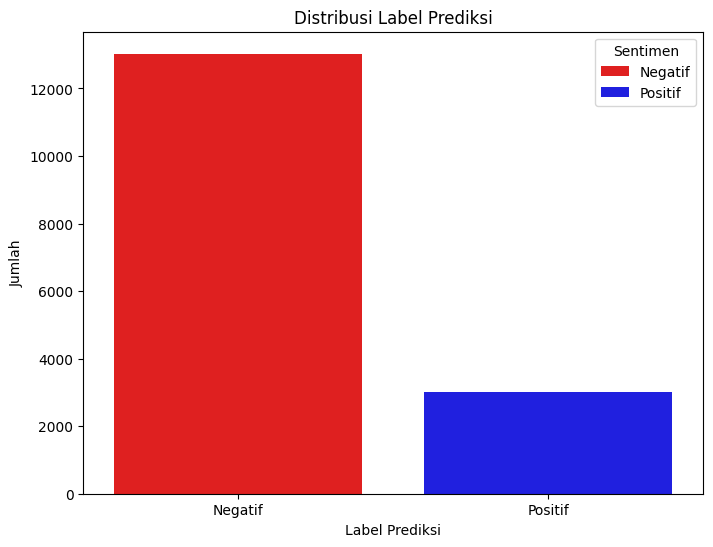

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik distribusi label asli
plt.figure(figsize=(8,6))
sns.countplot(data=datakk, x='label', hue='label', palette={0: 'red', 1: 'blue'})  # Menggunakan hue dan palette
plt.title('Distribusi Label Asli')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Negatif', 'Positif'])
plt.legend(title='Sentimen', labels=['Negatif', 'Positif'])  # Menambahkan legend
plt.show()

# Grafik distribusi label prediksi
plt.figure(figsize=(8,6))
sns.countplot(data=datakk, x='predicted_label', hue='predicted_label', palette={0: 'red', 1: 'blue'})  # Menggunakan hue dan palette
plt.title('Distribusi Label Prediksi')
plt.xlabel('Label Prediksi')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Negatif', 'Positif'])
plt.legend(title='Sentimen', labels=['Negatif', 'Positif'])  # Menambahkan legend
plt.show()

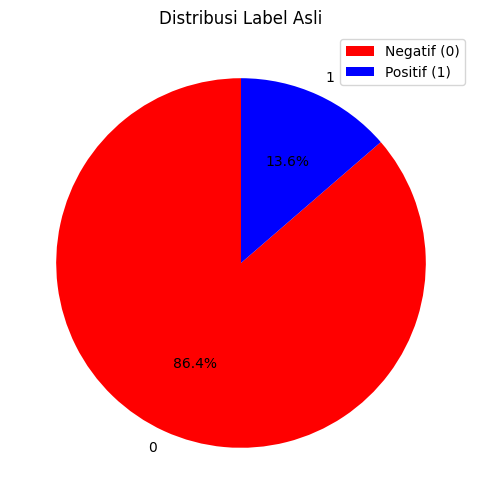

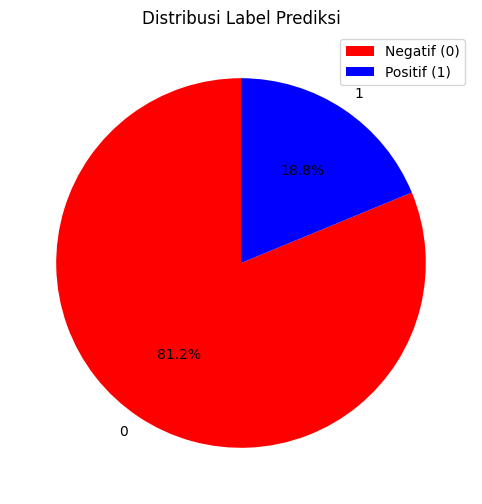

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Pie chart untuk distribusi label asli
label_counts = datakk['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['red', 'blue'])  # Red for 0, Blue for 1
plt.title('Distribusi Label Asli')
plt.legend(labels=['Negatif (0)', 'Positif (1)']) # Adding legend
plt.show()

# Pie chart untuk distribusi label prediksi
predicted_counts = datakk['predicted_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['red', 'blue'])  # Red for 0, Blue for 1
plt.title('Distribusi Label Prediksi')
plt.legend(labels=['Negatif (0)', 'Positif (1)']) # Adding legend
plt.show()